# Bank Marketing Dataset Anaysis

#### Author: Geovanny Tabango
#### Description: Analysis of bank marketing campaign data


# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

### 1. Bussiness Understanding
 - Marketing campaing from 2008 to 2010 (2 Years Data Colleted).
 - The target value `y` describes wether the customer holds subscribe deposit in the bank or not.
 - Its expected to have the samples a larger distribution of `no` subscription compared to the `yes`.
 - The marketing team is to use the information extracted from the data set to better orginze a strategy to possitevely indentify costumers that are more likely to say `yes` to subscribe to the deposit.
 - The end objective is to better utilize the resources of the banking allowing a more room of improvements in the calls.

### 2. Data Understanding

##### 2.1 Dependencies for data analyis and Machine Learning algorithms

In [43]:

# Data manipulation and analysis
import json
import joblib
import numpy as np
import os
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
# 4.1 Import required libraries for modeling
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [19]:
#Set up for plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [5]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(98)

#### 2.2 Load the dataset

In [8]:
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
# Load the dataset in to a pandas dataframe.
df = pd.read_csv('../data/raw/bank.csv', delimiter=';')
print(f"Data Shape:{df.shape}")


Data Shape:(4521, 17)


#### 2.3 Display the basic information of the dataset.

- By the description of the dataset there are 0 missing values. 

In [9]:
#Double checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
#Display the 5 firt rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
#Display the 5 last rows of the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
# Display the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


In [15]:
# The skew method is to determine the skewness of the dataset.
# This method is only applied to the numerical type of data.
# 0 means the data is normally distributed.
# values close to 1 means the data is skewed to the right.
# values close to -1 means the data is skewed to the left.
df.skew(numeric_only=True)

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [16]:
# Display the unique values of the dataset.
# Selet all the 'object' type of columns and apply the values_counts method which will display the unique values of the columns.

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'job':
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for column 'education':
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for column 'default':
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes    2559
no     1962
Name: count, dtype: int64


Value counts for column 'loan':
loan
no     3830
yes     691
Name: count, dtype: int64


Value counts for column 'contact':
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64


Value counts

In [17]:
# Display the unique values in the dataset.

for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]


Unique values in column 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


Unique values in column 'marital':
['married' 'single' 'divorced']


Unique values in column 'education':
['primary' 'secondary' 'tertiary' 'unknown']


Unique values in column 'default':
['no' 'yes']


Unique values in column 'balance':
[ 1787  4789  1350 ...  -333 -3313  1137]


Unique values in column 'housing':
['no' 'yes']


Unique values in column 'loan':
['no' 'yes']


Unique values in column 'contact':
['cellular' 'unknown' 'telephone']


Unique values in column 'day':
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]



#### 2.5 Exploratory Data Analysis (EDA)

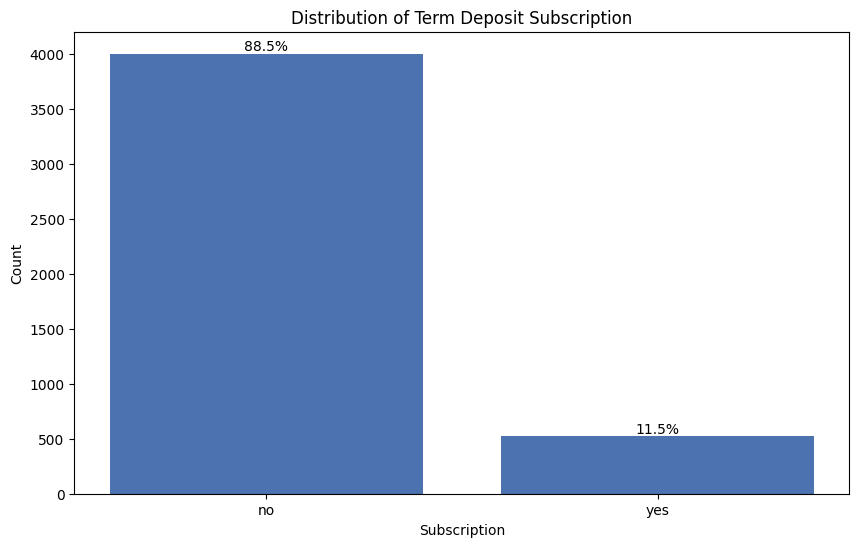


Target Variable Distribution:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [18]:
def analyze_target_distribution(df):
    """
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    plt.figure(figsize=(10, 6))
    target_dist = df['y'].value_counts()
    
    # Create bar plot
    plt.bar(target_dist.index, target_dist.values)
    plt.title('Distribution of Term Deposit Subscription')
    plt.xlabel('Subscription')
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for i, v in enumerate(target_dist.values):
        percentage = (v/total) * 100
        plt.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')
    
    plt.savefig('../reports/figures/Task_1/target_variable_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nTarget Variable Distribution:")
    print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_target_distribution(df)


Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


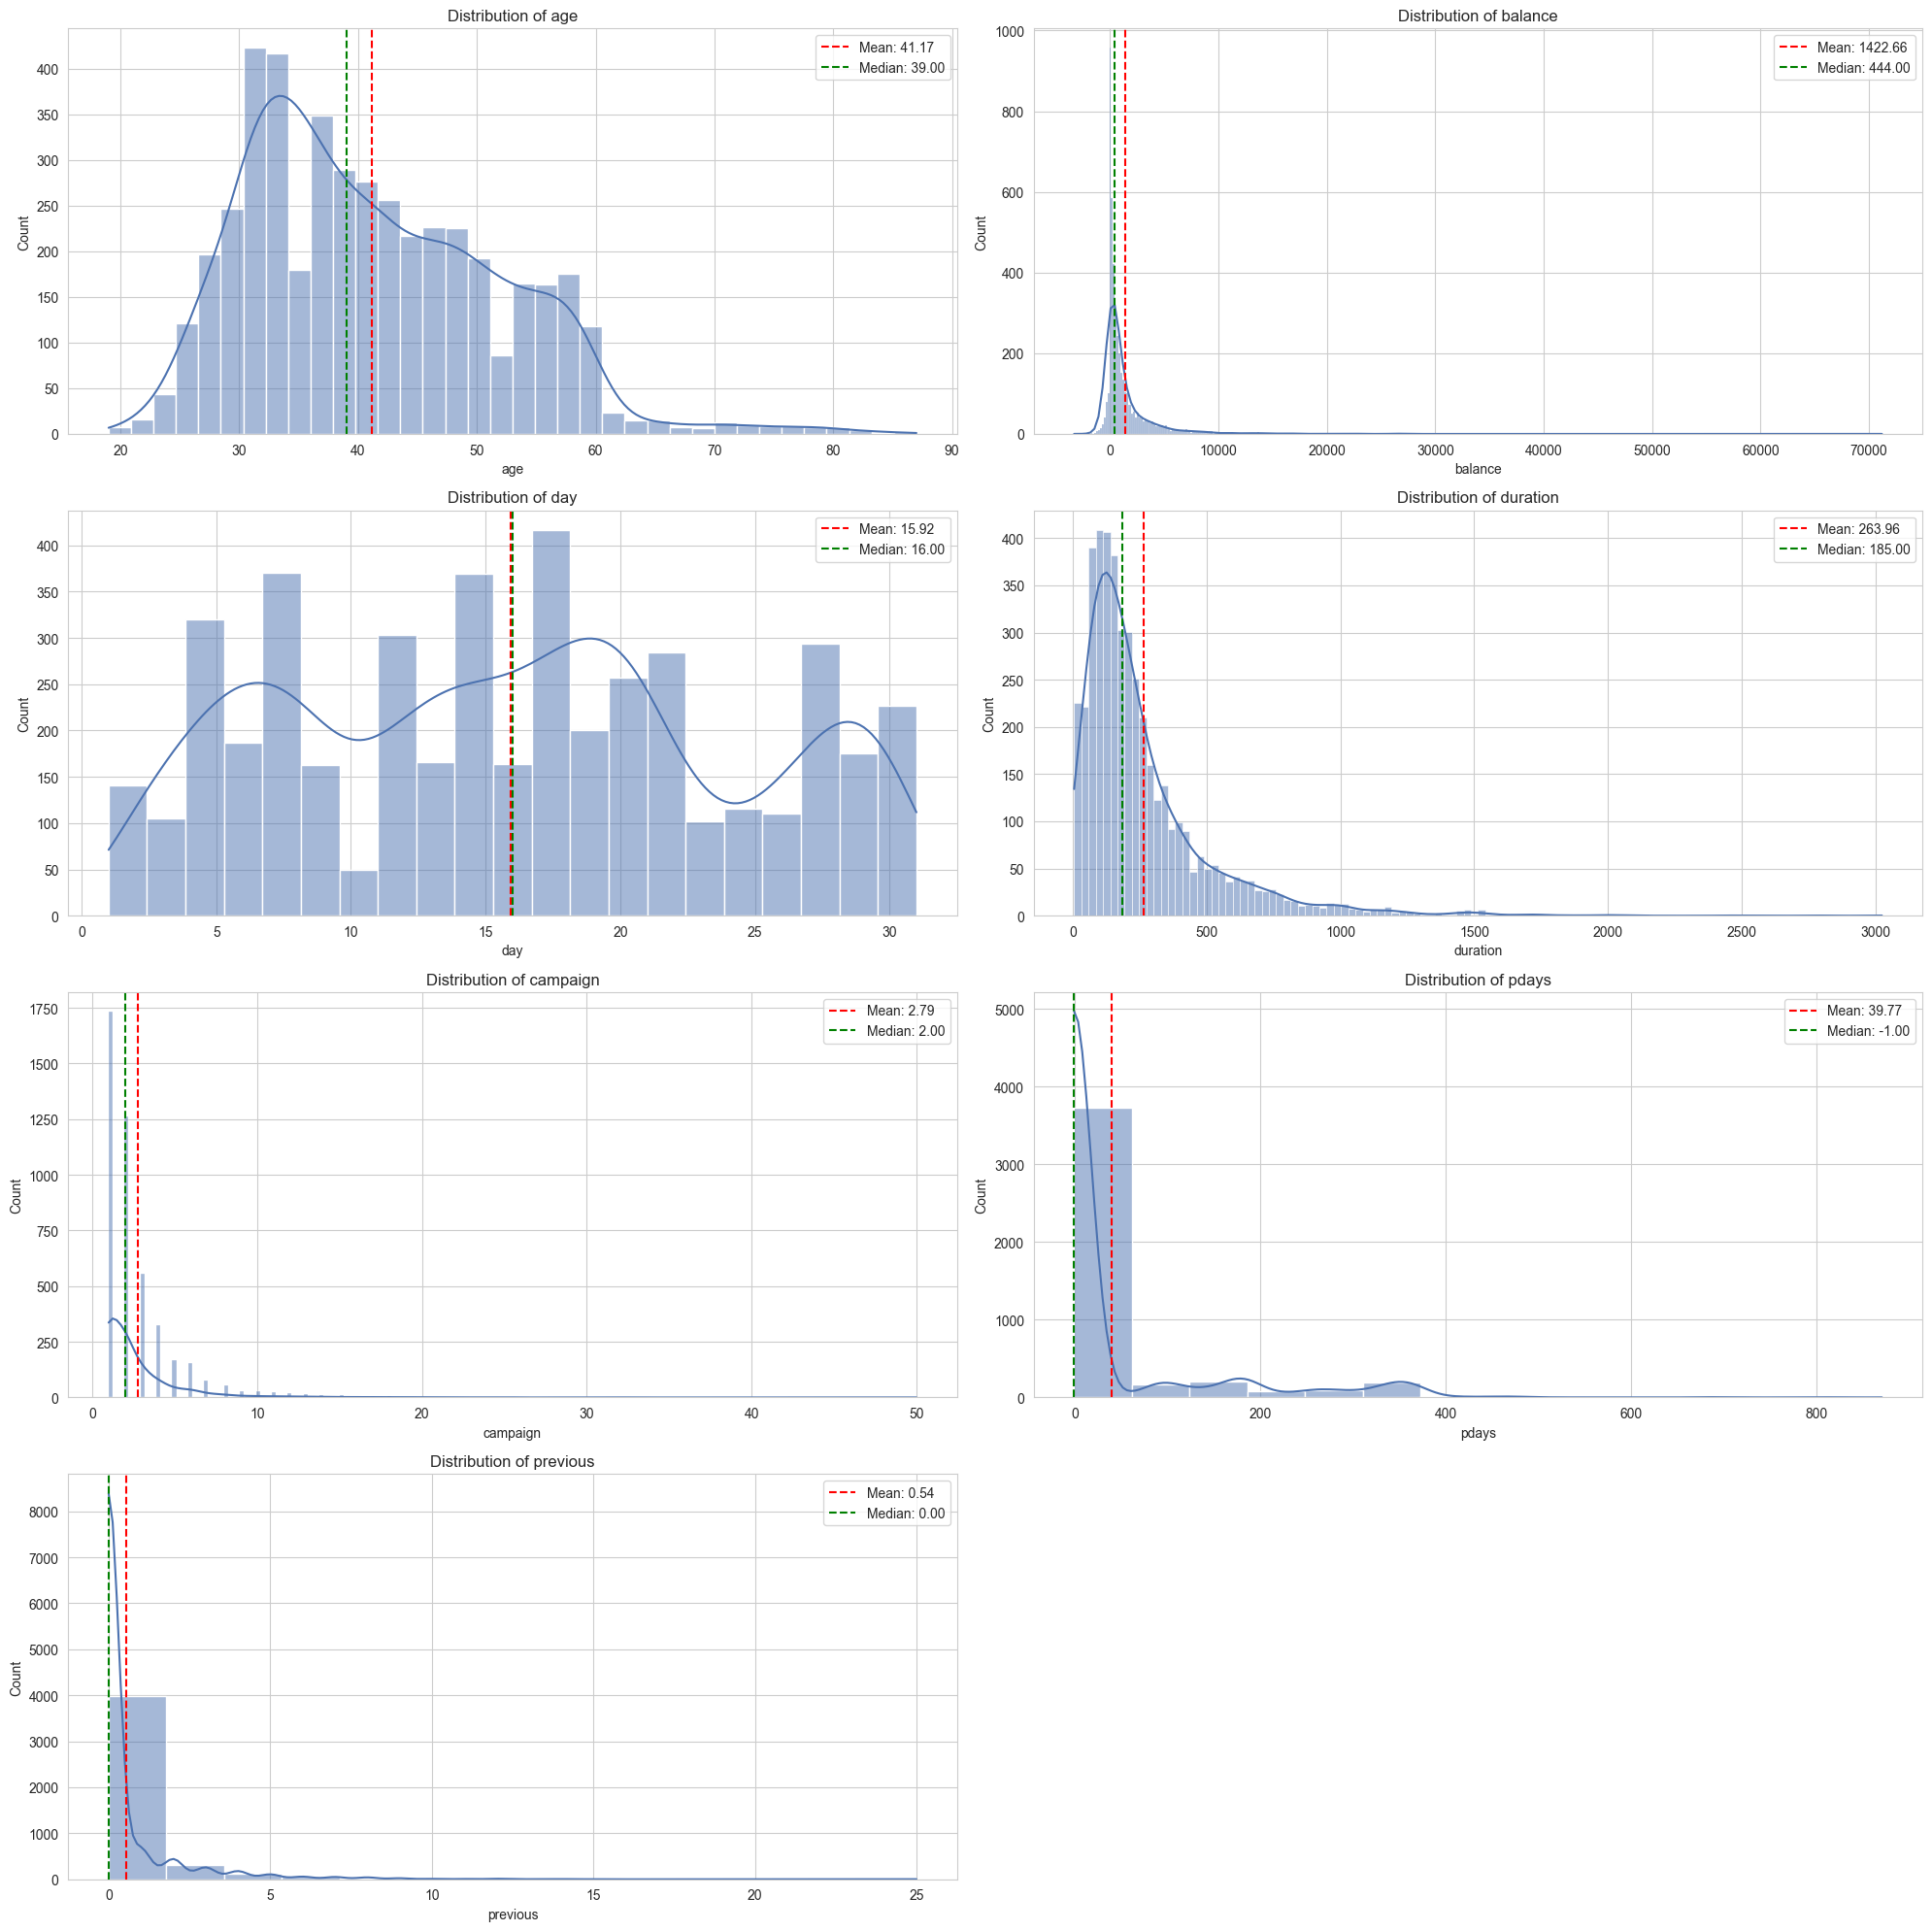


Numerical Features Summary Statistics:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.

In [ ]:
#Numerical Features Analysis
def analyze_numerical_features(df):
    """
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:", numerical_features.tolist())
    
    # Create distribution plots
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        # Plot histogram with KDE
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        
        # Add descriptive statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='r', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='g', linestyle='--', 
                       label=f'Median: {median_val:.2f}')
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/numerical_features_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nNumerical Features Summary Statistics:")
    print(df[numerical_features].describe())

analyze_numerical_features(df)


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


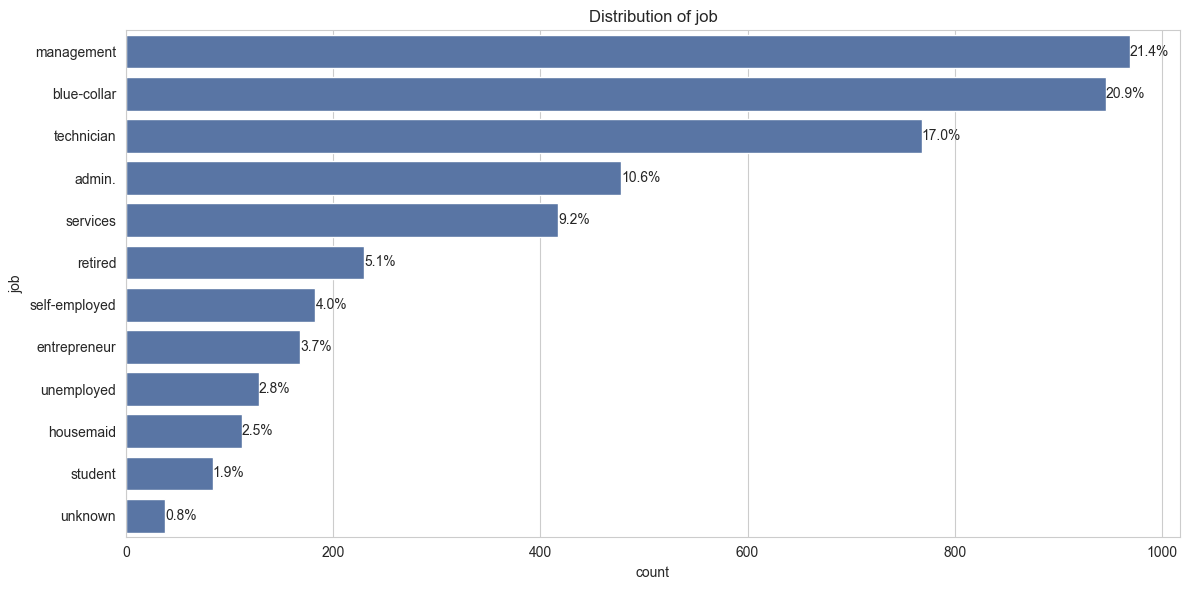


Distribution of job:
job
management       21.43%
blue-collar      20.92%
technician       16.99%
admin.           10.57%
services          9.22%
retired           5.09%
self-employed     4.05%
entrepreneur      3.72%
unemployed        2.83%
housemaid         2.48%
student           1.86%
unknown           0.84%
Name: proportion, dtype: object


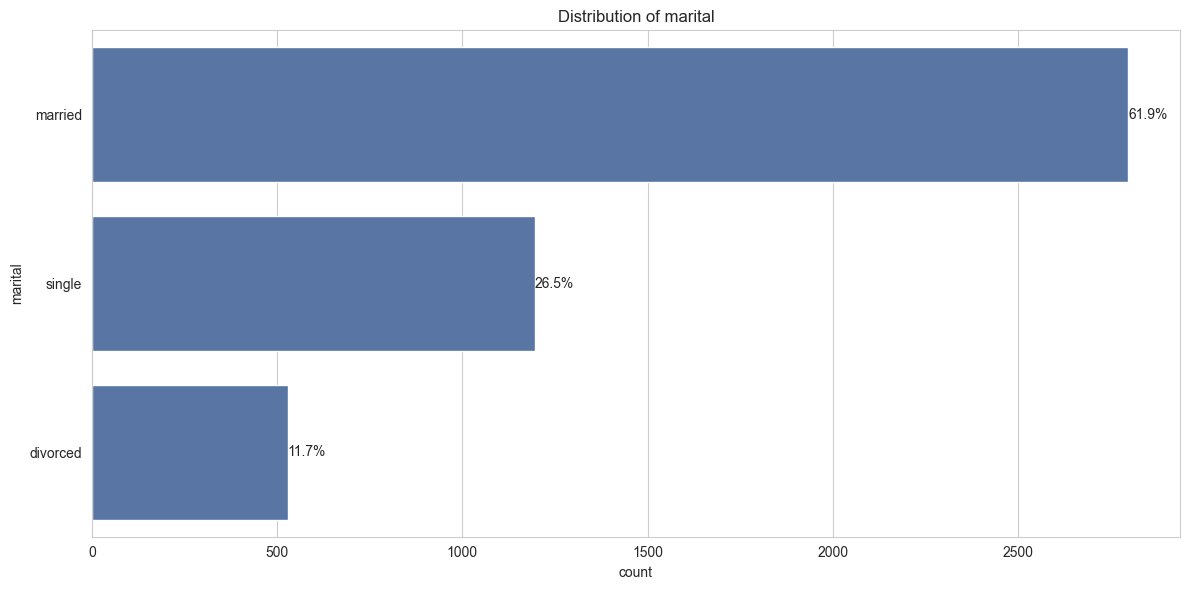


Distribution of marital:
marital
married     61.87%
single      26.45%
divorced    11.68%
Name: proportion, dtype: object


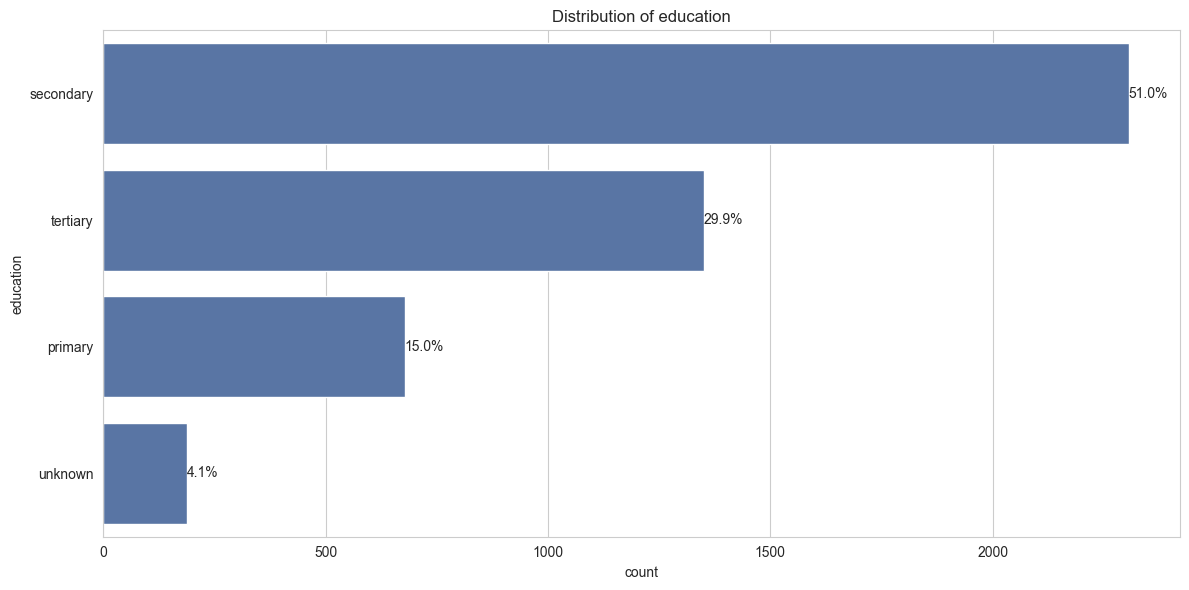


Distribution of education:
education
secondary    51.01%
tertiary     29.86%
primary       15.0%
unknown       4.14%
Name: proportion, dtype: object


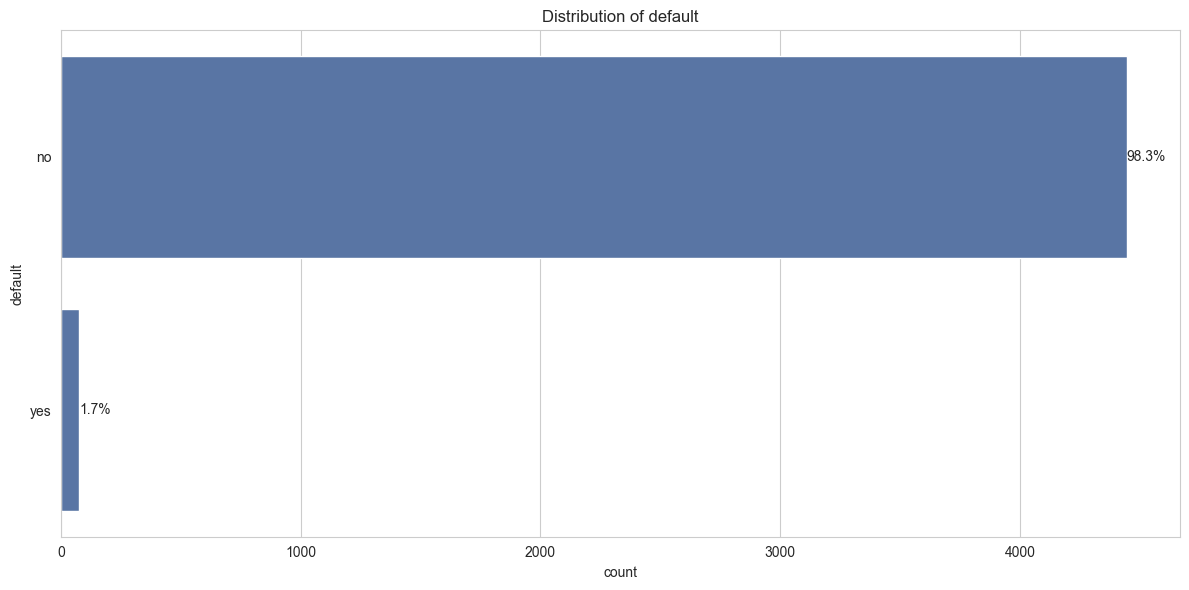


Distribution of default:
default
no     98.32%
yes     1.68%
Name: proportion, dtype: object


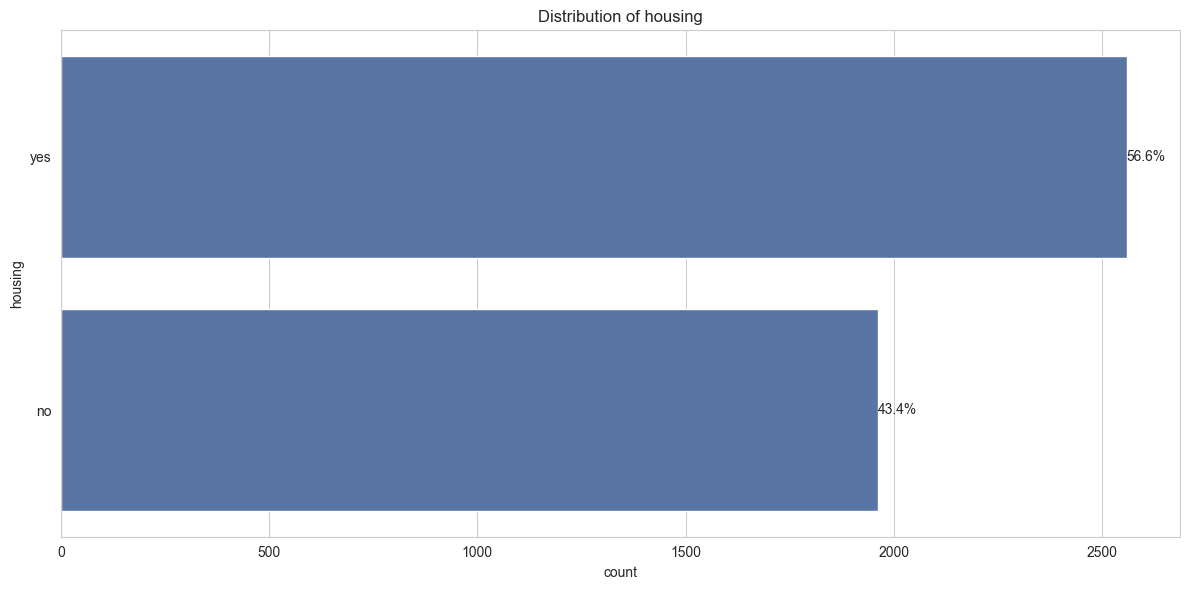


Distribution of housing:
housing
yes    56.6%
no     43.4%
Name: proportion, dtype: object


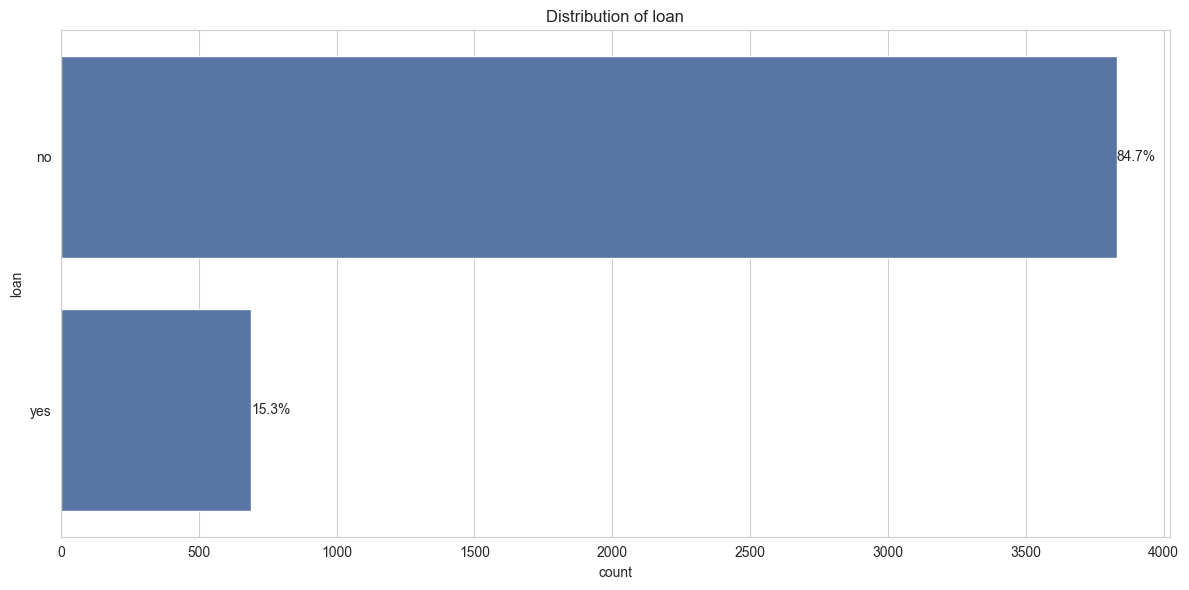


Distribution of loan:
loan
no     84.72%
yes    15.28%
Name: proportion, dtype: object


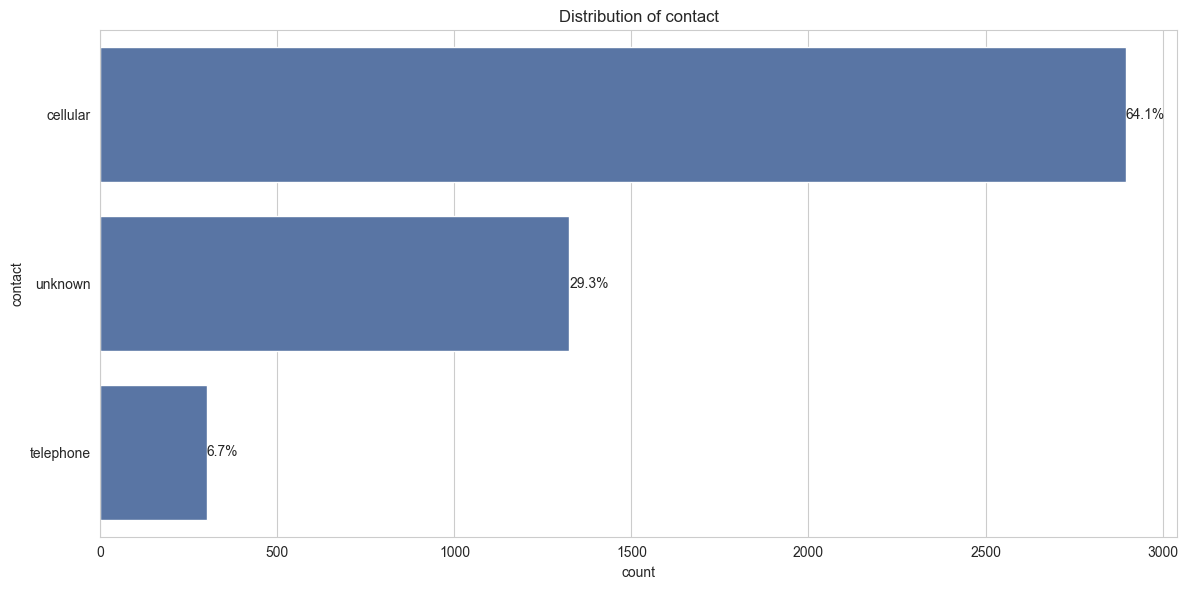


Distribution of contact:
contact
cellular     64.06%
unknown      29.29%
telephone     6.66%
Name: proportion, dtype: object


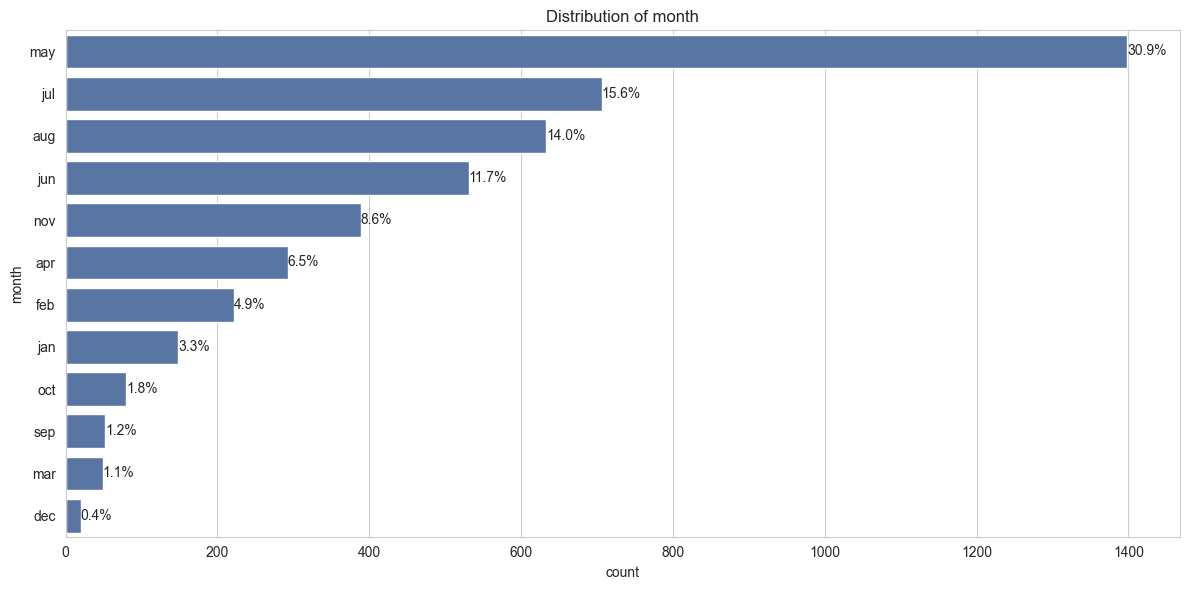


Distribution of month:
month
may    30.92%
jul    15.62%
aug     14.0%
jun    11.75%
nov      8.6%
apr     6.48%
feb     4.91%
jan     3.27%
oct     1.77%
sep     1.15%
mar     1.08%
dec     0.44%
Name: proportion, dtype: object


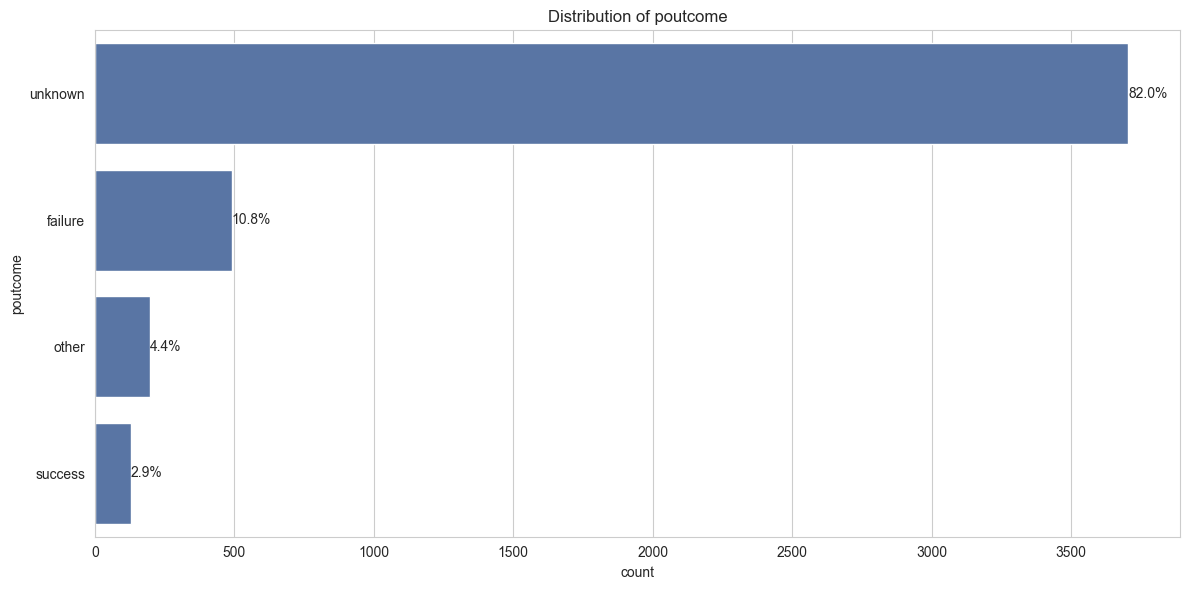


Distribution of poutcome:
poutcome
unknown    81.95%
failure    10.84%
other       4.36%
success     2.85%
Name: proportion, dtype: object


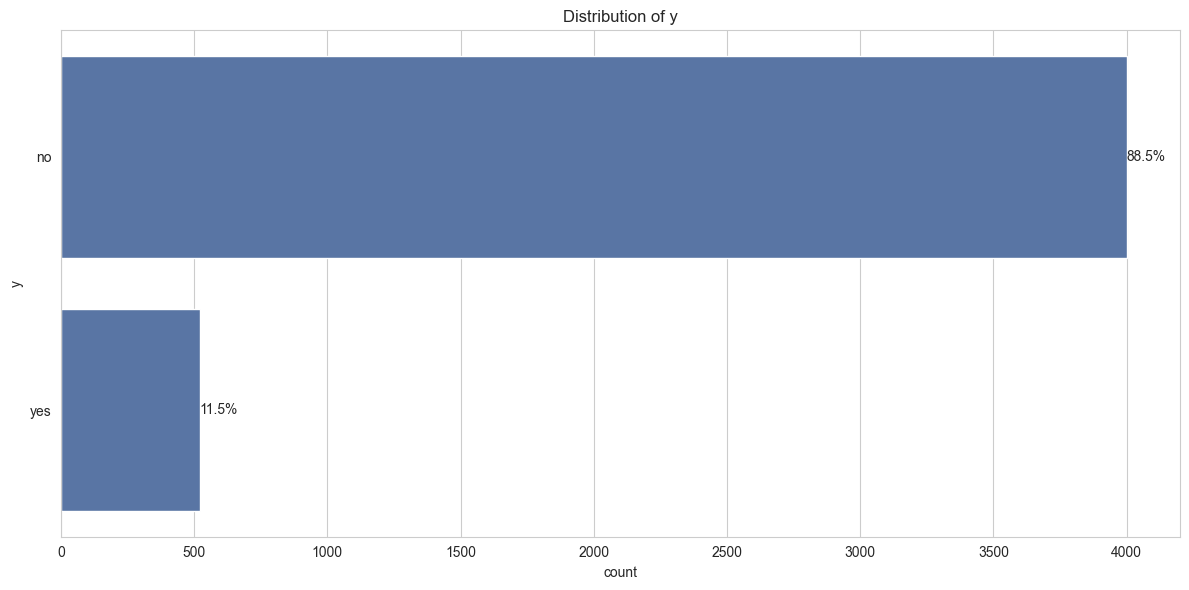


Distribution of y:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [ ]:
# Categorical Features Analysis
def analyze_categorical_features(df):
    """
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features:", categorical_features.tolist())
    
    # Create distribution plots
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Create count plot
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        
        # Add percentage labels
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_width()/total
            plt.gca().annotate(f'{percentage:.1f}%', 
                             (p.get_width(), p.get_y()+p.get_height()/2),
                             ha='left', va='center')
        
        plt.tight_layout()
        plt.savefig(f'../reports/figures/Task_1/categorical_{feature}_distribution.png')
        plt.show()
        plt.close()
        
        # Print value counts and percentages
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_categorical_features(df)

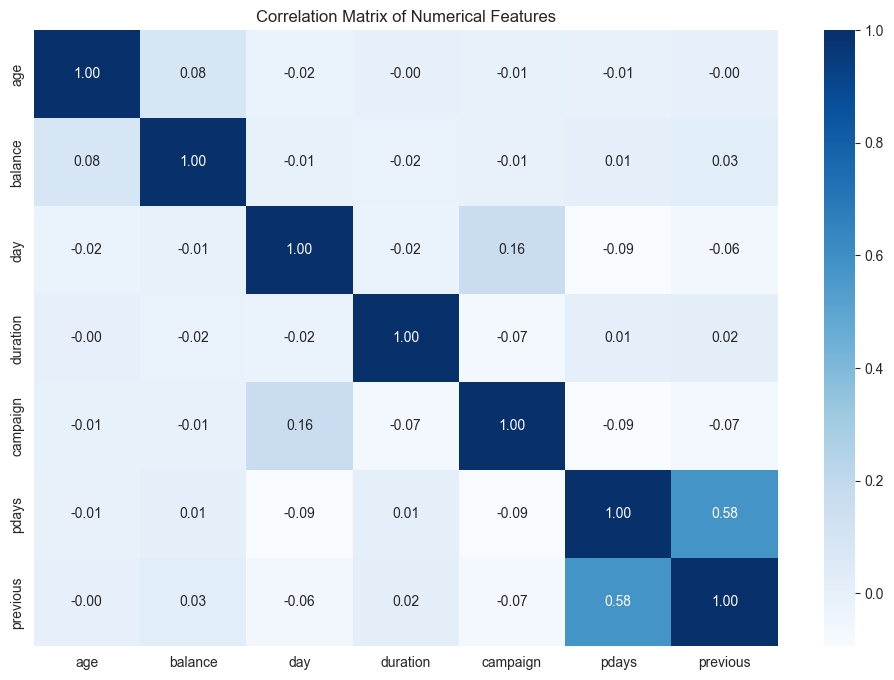


Strong Correlations (|correlation| > 0.5):
previous - pdays: 0.58


In [ ]:
# Correlation Analysis
def analyze_correlations(df):
    """
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Numerical correlations
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('../reports/figures/Task_1/correlation_matrix.png')
    plt.show()
    plt.close()
    
    # Print strong correlations
    print("\nStrong Correlations (|correlation| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append(f"{correlation_matrix.columns[i]} - "
                                 f"{correlation_matrix.columns[j]}: "
                                 f"{correlation_matrix.iloc[i, j]:.2f}")
    for corr in strong_corr:
        print(corr)

analyze_correlations(df)

### 3. Data Preparation

- Handle categorical variables
- Feature scaling
- Organize data for modeling

#### 3.1 Basic Preprocessing

In [37]:
# 3.1.2 Separate features by type
binary_features = ['default', 'housing', 'loan']
multi_class_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

print("Binary features:", binary_features)
print("\nMulti-class features:", multi_class_features)
print("\nNumerical features:", numerical_features)

# Verify all features are accounted for
all_features = binary_features + multi_class_features + numerical_features
print("\nTotal features:", len(all_features))
print("All features in dataset:", len(df.columns) - 1)  # -1 for target

Binary features: ['default', 'housing', 'loan']

Multi-class features: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Total features: 16
All features in dataset: 16


In [38]:
# 3.1.3 Handle binary categorical variables (same as before)
def encode_binary_features(df, binary_features):
    """
    Encode binary categorical variables using LabelEncoder.
    """
    df_processed = df.copy()
    label_encoder = LabelEncoder()
    
    for feature in binary_features:
        df_processed[feature] = label_encoder.fit_transform(df_processed[feature])
        print(f"Encoded {feature}: {df_processed[feature].unique()}")
        
    return df_processed

df_processed = encode_binary_features(df, binary_features)

Encoded default: [0 1]
Encoded housing: [0 1]
Encoded loan: [0 1]


In [39]:
# 3.1.4 Handle multi-class categorical variables (same as before)
def encode_multi_class_features(df, multi_class_features):
    """
    Encode multi-class categorical variables using OneHotEncoder.
    """
    onehot = OneHotEncoder(drop='first', sparse_output=False)
    encoded_features = onehot.fit_transform(df[multi_class_features])
    feature_names = onehot.get_feature_names_out(multi_class_features)
    
    encoded_df = pd.DataFrame(
        encoded_features,
        columns=feature_names,
        index=df.index
    )
    
    print("Multi-class encoding summary:")
    for feature in multi_class_features:
        n_categories = len(df[feature].unique())
        n_columns = n_categories - 1
        print(f"{feature}: {n_categories} categories → {n_columns} columns")
    
    return encoded_df

encoded_categorical = encode_multi_class_features(df_processed, multi_class_features)

Multi-class encoding summary:
job: 12 categories → 11 columns
marital: 3 categories → 2 columns
education: 4 categories → 3 columns
contact: 3 categories → 2 columns
month: 12 categories → 11 columns
poutcome: 4 categories → 3 columns


In [40]:
# 3.1.5 Scale numerical features (modified to show more details)
def scale_numerical_features(df, numerical_features):
    """
    Scale numerical features using StandardScaler.
    """
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[numerical_features])
    
    scaled_df = pd.DataFrame(
        scaled_features,
        columns=numerical_features,
        index=df.index
    )
    
    print("Scaling summary:")
    for col in numerical_features:
        print(f"\n{col}:")
        print(f"Original - mean: {df[col].mean():.3f}, std: {df[col].std():.3f}")
        print(f"Scaled - mean: {scaled_df[col].mean():.3f}, std: {scaled_df[col].std():.3f}")
        
    return scaled_df, scaler  # Return scaler for later use

scaled_numerical, scaler = scale_numerical_features(df_processed, numerical_features)

Scaling summary:

age:
Original - mean: 41.170, std: 10.576
Scaled - mean: -0.000, std: 1.000

balance:
Original - mean: 1422.658, std: 3009.638
Scaled - mean: -0.000, std: 1.000

day:
Original - mean: 15.915, std: 8.248
Scaled - mean: 0.000, std: 1.000

duration:
Original - mean: 263.961, std: 259.857
Scaled - mean: -0.000, std: 1.000

campaign:
Original - mean: 2.794, std: 3.110
Scaled - mean: -0.000, std: 1.000

pdays:
Original - mean: 39.767, std: 100.121
Scaled - mean: -0.000, std: 1.000

previous:
Original - mean: 0.543, std: 1.694
Scaled - mean: 0.000, std: 1.000


In [41]:
# 3.1.6 Combine processed features (modified)
def combine_processed_features(binary_df, encoded_categorical, scaled_numerical):
    """
    Combine all processed features into final dataset.
    """
    # Get binary features
    binary_features_processed = binary_df[binary_features]
    
    # Combine all features
    X = pd.concat([
        binary_features_processed,  # 3 features
        encoded_categorical,        # Multi-class encoded features
        scaled_numerical           # 7 numerical features
    ], axis=1)
    
    # Get target variable
    y = binary_df['y']
    
    print("\nFinal dataset composition:")
    print(f"Binary features: {len(binary_features)} columns")
    print(f"Encoded categorical: {encoded_categorical.shape[1]} columns")
    print(f"Numerical features: {len(numerical_features)} columns")
    print(f"Total features: {X.shape[1]} columns")
    
    return X, y

X, y = combine_processed_features(
    df_processed,
    encoded_categorical,
    scaled_numerical
)


Final dataset composition:
Binary features: 3 columns
Encoded categorical: 32 columns
Numerical features: 7 columns
Total features: 42 columns


In [33]:
# Apply SMOTE for handling class imbalance
def apply_smote(X, y, random_state=42):
    """
    Apply SMOTE to balance the dataset.
    """
    print("Original class distribution:")
    print(Counter(y))
    
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    print("\nResampled class distribution:")
    print(Counter(y_resampled))
    
    return X_resampled, y_resampled

X_smote, y_smote = apply_smote(X, y)

Original class distribution:
Counter({'no': 4000, 'yes': 521})

Resampled class distribution:
Counter({'no': 4000, 'yes': 4000})


In [34]:
#  Apply SMOTEENN for comparison
def apply_smoteenn(X, y, random_state=42):
    """
    Apply SMOTEENN to balance the dataset.
    """
    print("Original class distribution:")
    print(Counter(y))
    
    smoteenn = SMOTEENN(random_state=random_state)
    X_resampled, y_resampled = smoteenn.fit_resample(X, y)
    
    print("\nResampled class distribution:")
    print(Counter(y_resampled))
    
    return X_resampled, y_resampled

X_smoteenn, y_smoteenn = apply_smoteenn(X, y)

Original class distribution:
Counter({'no': 4000, 'yes': 521})

Resampled class distribution:
Counter({'yes': 3971, 'no': 3116})


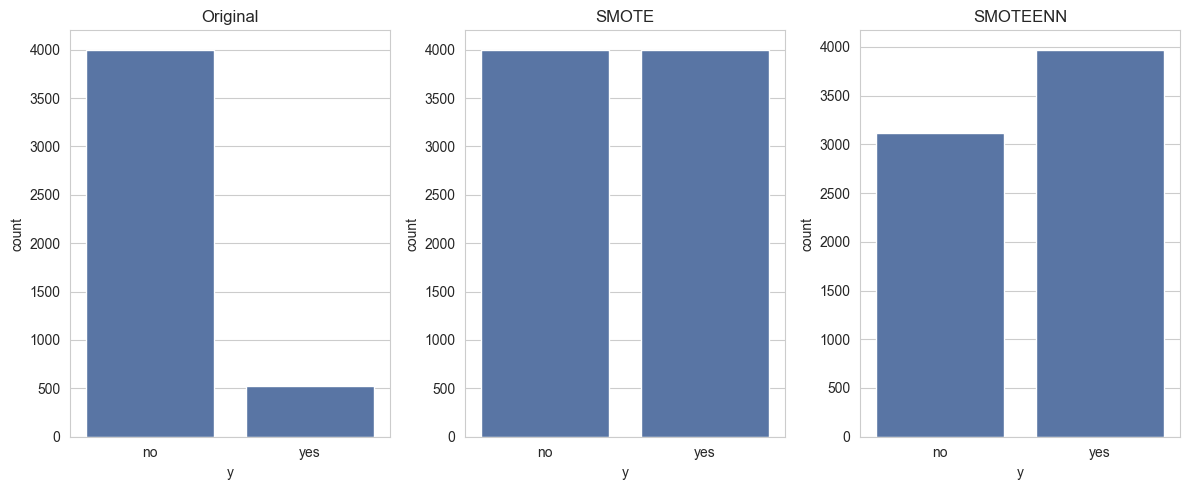

In [35]:
# Compare sample distributions
def compare_sampling_methods(y_original, y_smote, y_smoteenn):
    """
    Compare distributions of different sampling methods.
    """
    plt.figure(figsize=(12, 5))
    
    # Original distribution
    plt.subplot(131)
    sns.countplot(x=y_original)
    plt.title('Original')
    
    # SMOTE distribution
    plt.subplot(132)
    sns.countplot(x=y_smote)
    plt.title('SMOTE')
    
    # SMOTEENN distribution
    plt.subplot(133)
    sns.countplot(x=y_smoteenn)
    plt.title('SMOTEENN')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/sampling_comparison.png')
    plt.show()
    plt.close()

compare_sampling_methods(y, y_smote, y_smoteenn)

In [42]:
# 3.2.5 Save processed datasets
def save_processed_data():
    """
    Save processed datasets and their respective features information.
    """
    # Directory to save processed data
    save_path = '../data/processed/Task_1_processed'
    
    # Save original processed data (before resampling)
    pd.DataFrame(X).to_csv(f'{save_path}/bank_processed_features.csv', index=False)
    pd.Series(y).to_csv(f'{save_path}/bank_processed_target.csv', index=False)
    
    # Save SMOTE processed data
    pd.DataFrame(X_smote).to_csv(f'{save_path}/bank_processed_smote_features.csv', index=False)
    pd.Series(y_smote).to_csv(f'{save_path}/bank_processed_smote_target.csv', index=False)
    
    # Save SMOTEENN processed data
    pd.DataFrame(X_smoteenn).to_csv(f'{save_path}/bank_processed_smoteenn_features.csv', index=False)
    pd.Series(y_smoteenn).to_csv(f'{save_path}/bank_processed_smoteenn_target.csv', index=False)
    
    # Save feature information
    feature_info = {
        'binary_features': binary_features,
        'multi_class_features': multi_class_features,
        'numerical_features': numerical_features,
        'encoded_feature_names': list(X.columns)
    }
    
    # Save feature information to JSON file
    with open(f'{save_path}/feature_info.json', 'w') as f:
        json.dump(feature_info, f, indent=4)
    
    print("Saved processed datasets:")
    print(f"Original shape: {X.shape}")
    print(f"SMOTE shape: {X_smote.shape}")
    print(f"SMOTEENN shape: {X_smoteenn.shape}")

# Save the processed data
save_processed_data()

Saved processed datasets:
Original shape: (4521, 42)
SMOTE shape: (8000, 42)
SMOTEENN shape: (7087, 42)


### 4. Data Modelling

In [44]:
# 4.2 Define the nested cross-validation structure
def create_nested_cv():
    """
    Create inner and outer cross-validation splits.
    """
    # Define the outer and inner cross-validation
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    return outer_cv, inner_cv

outer_cv, inner_cv = create_nested_cv()

In [53]:
# 4.7.2 Update scoring metrics for encoded labels
def define_scoring_metrics():
    """
    Define the scoring metrics for model evaluation with binary labels.
    """
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, pos_label=1),
        'recall': make_scorer(recall_score, pos_label=1),
        'f1': make_scorer(f1_score, pos_label=1)
    }
    
    return scoring

scoring = define_scoring_metrics()

In [46]:
# 4.4 Define model parameters for grid search
def define_model_parameters():
    """
    Define parameter grids for each model.
    """
    lr_params = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'class_weight': ['balanced', None]
    }
    
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced', 'balanced_subsample']
    }
    
    return {
        'logistic': lr_params,
        'random_forest': rf_params
    }

model_parameters = define_model_parameters()

In [47]:
# 4.5 Initialize models
def initialize_models():
    """
    Initialize the models to be evaluated.
    """
    models = {
        'logistic': LogisticRegression(random_state=42),
        'random_forest': RandomForestClassifier(random_state=42)
    }
    
    return models

models = initialize_models()

In [48]:
# 4.6 Define nested cross-validation function
from sklearn.model_selection import GridSearchCV

def nested_cv_evaluation(X, y, model, param_grid, outer_cv, inner_cv, scoring):
    """
    Perform nested cross-validation for a given model.
    
    Args:
        X: Features
        y: Target
        model: Model to evaluate
        param_grid: Parameter grid for GridSearchCV
        outer_cv: Outer cross-validation splitter
        inner_cv: Inner cross-validation splitter
        scoring: Scoring metrics
    """
    # Initialize results storage
    outer_results = {metric: [] for metric in scoring.keys()}
    
    # Outer loop
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Inner loop - GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=inner_cv,
            scoring='f1',  # Use F1 for optimization
            n_jobs=-1
        )
        
        # Fit on training data
        grid_search.fit(X_train, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Evaluate on test set
        y_pred = best_model.predict(X_test)
        
        # Calculate and store metrics
        for metric_name, scorer in scoring.items():
            score = scorer._score_func(y_test, y_pred)
            outer_results[metric_name].append(score)
    
    # Calculate mean and std for each metric
    final_results = {}
    for metric, values in outer_results.items():
        final_results[metric] = {
            'mean': np.mean(values),
            'std': np.std(values)
        }
    
    return final_results

In [51]:
# 4.7.1 Prepare labels and data
def prepare_data_for_modeling(X, y):
    """
    Convert pandas data to numpy arrays and encode labels.
    """
    # Convert features to numpy if needed
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    # Convert target to numpy if needed
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    
    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    return X, y, label_encoder

# Prepare SMOTE data
X_smote_np, y_smote_np, le_smote = prepare_data_for_modeling(X_smote, y_smote)
# Prepare SMOTEENN data
X_smoteenn_np, y_smoteenn_np, le_smoteenn = prepare_data_for_modeling(X_smoteenn, y_smoteenn)

In [54]:
# 4.7.2 Evaluate Logistic Regression with SMOTE
print("Evaluating Logistic Regression with SMOTE...")
lr_smote_results = nested_cv_evaluation(
    X_smote_np, 
    y_smote_np,
    models['logistic'],
    model_parameters['logistic'],
    outer_cv, 
    inner_cv,
    scoring
)

print("\nResults:")
for metric, values in lr_smote_results.items():
    print(f"{metric}: {values['mean']:.3f} (±{values['std']:.3f})")

Evaluating Logistic Regression with SMOTE...

Results:
accuracy: 0.853 (±0.007)
precision: 0.852 (±0.006)
recall: 0.854 (±0.012)
f1: 0.853 (±0.008)


In [55]:
# 4.7.4 Evaluate Random Forest with SMOTE
print("Evaluating Random Forest with SMOTE...")
rf_smote_results = nested_cv_evaluation(
   X_smote_np, 
   y_smote_np,
   models['random_forest'],
   model_parameters['random_forest'],
   outer_cv, 
   inner_cv,
   scoring
)

print("\nResults:")
for metric, values in rf_smote_results.items():
   print(f"{metric}: {values['mean']:.3f} (±{values['std']:.3f})")

Evaluating Random Forest with SMOTE...

Results:
accuracy: 0.955 (±0.007)
precision: 0.951 (±0.005)
recall: 0.959 (±0.010)
f1: 0.955 (±0.007)


In [57]:
# 4.7.5 Evaluate Logistic Regression with SMOTEENN
print("Evaluating Logistic Regression with SMOTEENN...")
lr_smoteenn_results = nested_cv_evaluation(
    X_smoteenn_np, 
    y_smoteenn_np,
    models['logistic'],
    model_parameters['logistic'],
    outer_cv, 
    inner_cv,
    scoring
)

print("\nResults:")
for metric, values in lr_smoteenn_results.items():
    print(f"{metric}: {values['mean']:.3f} (±{values['std']:.3f})")

Evaluating Logistic Regression with SMOTEENN...

Results:
accuracy: 0.912 (±0.008)
precision: 0.919 (±0.003)
recall: 0.924 (±0.013)
f1: 0.922 (±0.007)


In [56]:
# 4.7.6 Evaluate Random Forest with SMOTEENN
print("Evaluating Random Forest with SMOTEENN...")
rf_smoteenn_results = nested_cv_evaluation(
    X_smoteenn_np, 
    y_smoteenn_np,
    models['random_forest'],
    model_parameters['random_forest'],
    outer_cv, 
    inner_cv,
    scoring
)

print("\nResults:")
for metric, values in rf_smoteenn_results.items():
    print(f"{metric}: {values['mean']:.3f} (±{values['std']:.3f})")

Evaluating Random Forest with SMOTEENN...

Results:
accuracy: 0.975 (±0.005)
precision: 0.972 (±0.005)
recall: 0.983 (±0.006)
f1: 0.978 (±0.004)


In [58]:
# 4.7.7 Create results comparison DataFrame
results_df = pd.DataFrame(columns=['Model', 'Sampling', 'Metric', 'Mean', 'Std'])

# Helper function to add results to DataFrame
def add_results(df, model_name, sampling, results):
    for metric, values in results.items():
        new_row = pd.DataFrame({
            'Model': [model_name],
            'Sampling': [sampling],
            'Metric': [metric],
            'Mean': [values['mean']],
            'Std': [values['std']]
        })
        df = pd.concat([df, new_row], ignore_index=True)
    return df

# Add all results
results_df = add_results(results_df, 'Logistic Regression', 'SMOTE', lr_smote_results)
results_df = add_results(results_df, 'Random Forest', 'SMOTE', rf_smote_results)
results_df = add_results(results_df, 'Logistic Regression', 'SMOTEENN', lr_smoteenn_results)
results_df = add_results(results_df, 'Random Forest', 'SMOTEENN', rf_smoteenn_results)

print("\nComplete Results Summary:")
print(results_df)


Complete Results Summary:
                  Model  Sampling     Metric      Mean       Std
0   Logistic Regression     SMOTE   accuracy  0.852875  0.007295
1   Logistic Regression     SMOTE  precision  0.852093  0.006389
2   Logistic Regression     SMOTE     recall  0.854000  0.011790
3   Logistic Regression     SMOTE         f1  0.853012  0.007794
4         Random Forest     SMOTE   accuracy  0.954750  0.007165
5         Random Forest     SMOTE  precision  0.950683  0.005498
6         Random Forest     SMOTE     recall  0.959250  0.009956
7         Random Forest     SMOTE         f1  0.954935  0.007242
8   Logistic Regression  SMOTEENN   accuracy  0.911949  0.007589
9   Logistic Regression  SMOTEENN  precision  0.919096  0.002740
10  Logistic Regression  SMOTEENN     recall  0.924198  0.012864
11  Logistic Regression  SMOTEENN         f1  0.921603  0.007227
12        Random Forest  SMOTEENN   accuracy  0.974882  0.004762
13        Random Forest  SMOTEENN  precision  0.972373  0.00477

C:\Users\geova\AppData\Local\Temp\ipykernel_18132\739046953.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


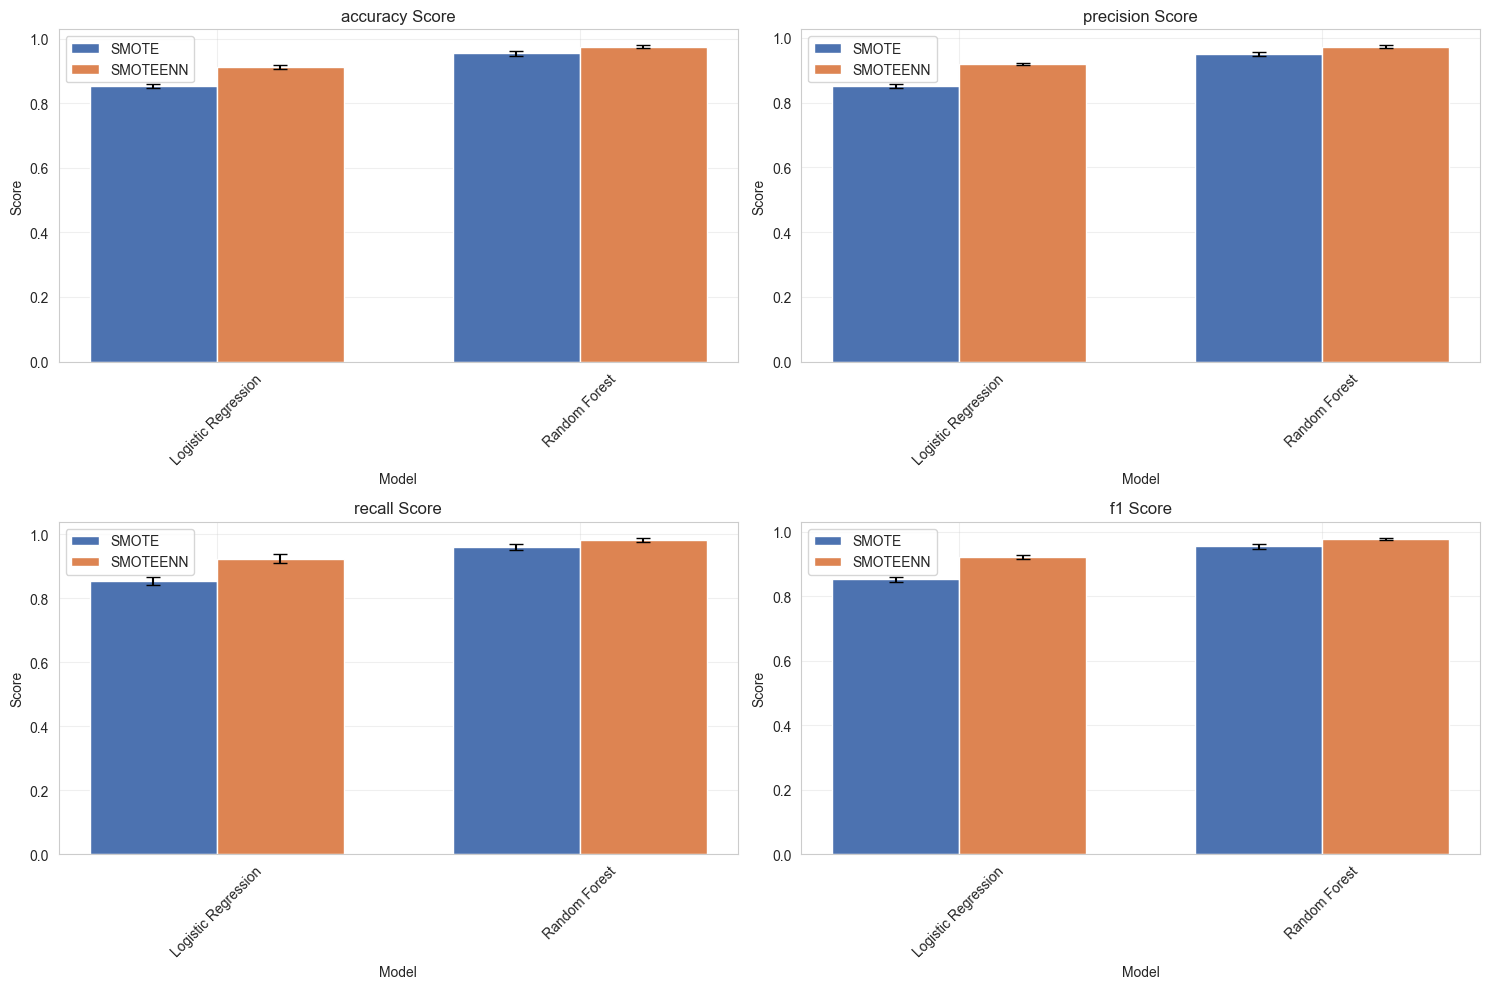

In [59]:
# 4.7.8 Visualize results comparison
plt.figure(figsize=(15, 10))

metrics = results_df['Metric'].unique()
n_metrics = len(metrics)

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    # Filter data for current metric
    metric_data = results_df[results_df['Metric'] == metric]
    
    # Create grouped bar plot
    model_types = metric_data['Model'].unique()
    x = np.arange(len(model_types))
    width = 0.35
    
    # Plot bars for SMOTE
    smote_data = metric_data[metric_data['Sampling'] == 'SMOTE']
    plt.bar(x - width/2, smote_data['Mean'], width, label='SMOTE',
            yerr=smote_data['Std'], capsize=5)
    
    # Plot bars for SMOTEENN
    smoteenn_data = metric_data[metric_data['Sampling'] == 'SMOTEENN']
    plt.bar(x + width/2, smoteenn_data['Mean'], width, label='SMOTEENN',
            yerr=smoteenn_data['Std'], capsize=5)
    
    plt.title(f'{metric} Score')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(x, model_types, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/Task_1/model_comparison.png')
plt.show()
plt.close()

In [60]:
# 4.7.9 Save final results
# Save results DataFrame
results_df.to_csv('../reports/model_evaluations/nested_cv_results.csv', index=False)

# Save best model configuration
best_model_idx = results_df[results_df['Metric'] == 'f1']['Mean'].idxmax()
best_configuration = results_df.loc[best_model_idx]

print("\nBest Model Configuration:")
print(f"Model: {best_configuration['Model']}")
print(f"Sampling: {best_configuration['Sampling']}")
print(f"F1 Score: {best_configuration['Mean']:.3f} (±{best_configuration['Std']:.3f})")


Best Model Configuration:
Model: Random Forest
Sampling: SMOTEENN
F1 Score: 0.978 (±0.004)


In [70]:
# 5.1 Train the final models
def train_final_models():
    """
    Train final models on both SMOTE and SMOTEENN data.
    """
    models_fitted = {
        'SMOTE': {
            'logistic': LogisticRegression(random_state=42),
            'random_forest': RandomForestClassifier(random_state=42)
        },
        'SMOTEENN': {
            'logistic': LogisticRegression(random_state=42),
            'random_forest': RandomForestClassifier(random_state=42)
        }
    }
    
    # Train on SMOTE data
    for name, model in models_fitted['SMOTE'].items():
        print(f"Training {name} on SMOTE data...")
        model.fit(X_smote_np, y_smote_np)
    
    # Train on SMOTEENN data
    for name, model in models_fitted['SMOTEENN'].items():
        print(f"Training {name} on SMOTEENN data...")
        model.fit(X_smoteenn_np, y_smoteenn_np)
    
    return models_fitted

# Train models
fitted_models = train_final_models()

Training logistic on SMOTE data...
Training random_forest on SMOTE data...
Training logistic on SMOTEENN data...
Training random_forest on SMOTEENN data...


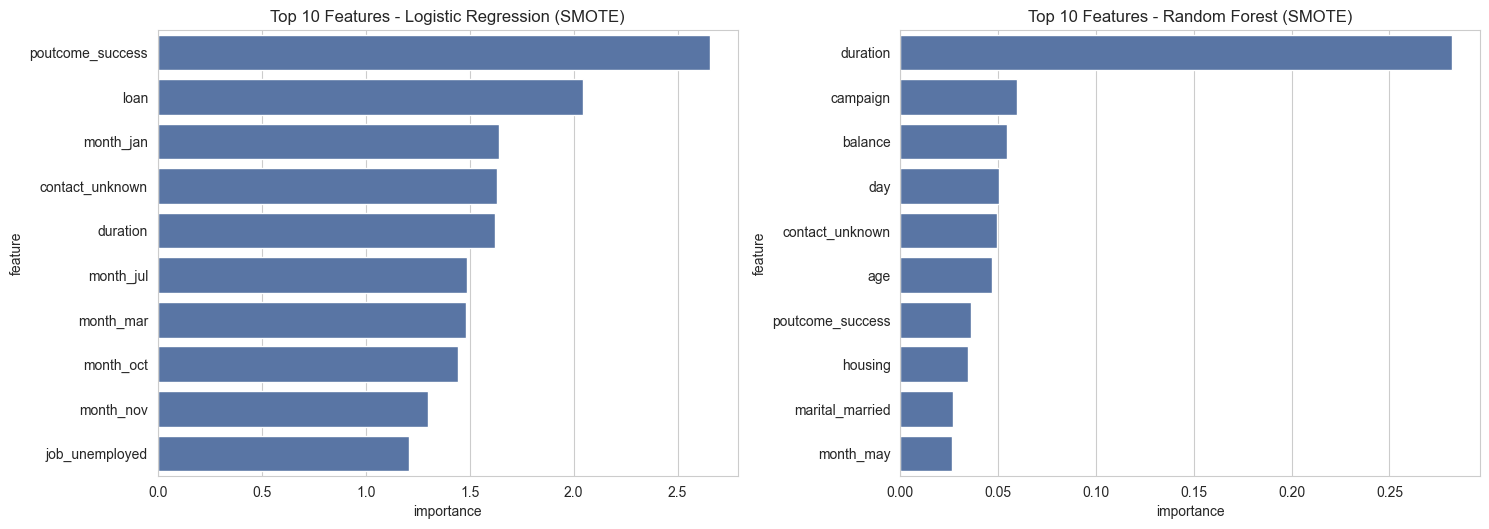

In [71]:
# 5.2 Feature Importance Analysis
def analyze_all_feature_importance(fitted_models):
    """
    Analyze feature importance for both models and sampling methods.
    """
    feature_names = list(X.columns)
    plt.figure(figsize=(15, 10))
    
    # SMOTE models
    plt.subplot(2, 2, 1)
    lr_importance = np.abs(fitted_models['SMOTE']['logistic'].coef_[0])
    lr_features = pd.DataFrame({
        'feature': feature_names,
        'importance': lr_importance
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=lr_features.head(10), x='importance', y='feature')
    plt.title('Top 10 Features - Logistic Regression (SMOTE)')
    
    plt.subplot(2, 2, 2)
    rf_importance = fitted_models['SMOTE']['random_forest'].feature_importances_
    rf_features = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_importance
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=rf_features.head(10), x='importance', y='feature')
    plt.title('Top 10 Features - Random Forest (SMOTE)')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/feature_importance.png')
    plt.show()
    
    return lr_features, rf_features

# Analyze feature importance
lr_imp, rf_imp = analyze_all_feature_importance(fitted_models)

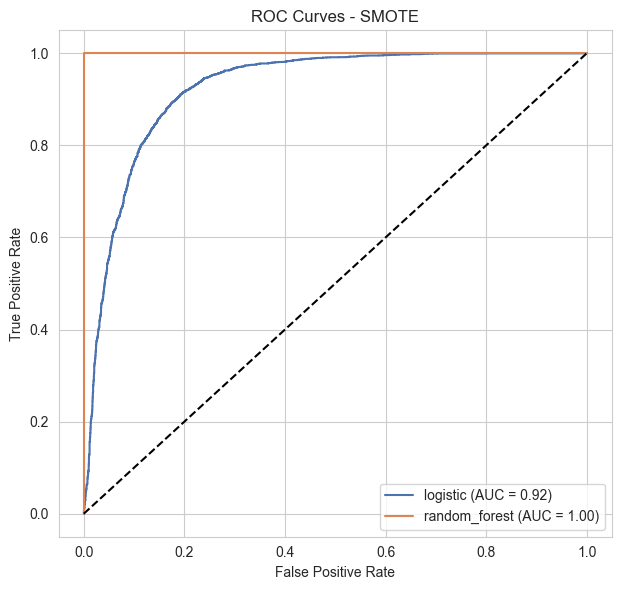

In [72]:
# 5.3 ROC Curves
def plot_roc_curves_comparison(fitted_models):
    """
    Plot ROC curves for all model-sampling combinations.
    """
    plt.figure(figsize=(12, 6))
    
    # SMOTE results
    plt.subplot(1, 2, 1)
    for name, model in fitted_models['SMOTE'].items():
        y_pred_proba = model.predict_proba(X_smote_np)[:, 1]
        fpr, tpr, _ = roc_curve(y_smote_np, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - SMOTE')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/roc_curves.png')
    plt.show()

# Plot ROC curves
plot_roc_curves_comparison(fitted_models)

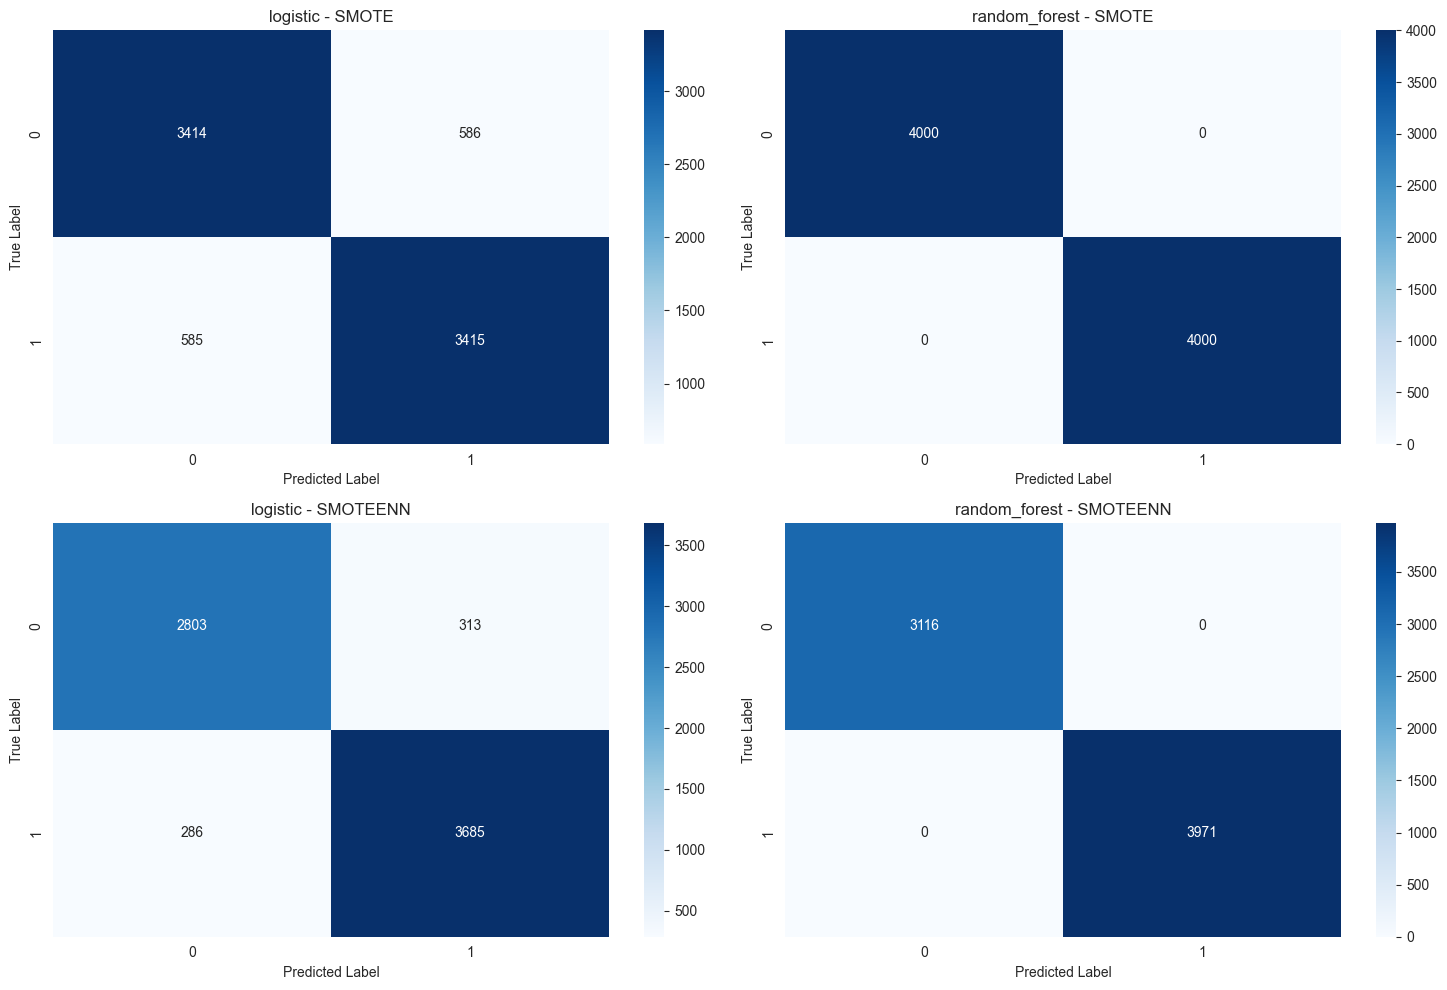

In [74]:
# 5.4 Confusion Matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrices(fitted_models):
    """
    Plot confusion matrices for all model-sampling combinations.
    """
    # Create subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # SMOTE models
    for idx, (name, model) in enumerate(fitted_models['SMOTE'].items()):
        # Make predictions
        y_pred = model.predict(X_smote_np)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_smote_np, y_pred)
        
        # Plot confusion matrix
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            ax=axes[0, idx]
        )
        
        # Set titles and labels
        axes[0, idx].set_title(f'{name} - SMOTE')
        axes[0, idx].set_ylabel('True Label')
        axes[0, idx].set_xlabel('Predicted Label')
    
    # SMOTEENN models
    for idx, (name, model) in enumerate(fitted_models['SMOTEENN'].items()):
        # Make predictions
        y_pred = model.predict(X_smoteenn_np)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_smoteenn_np, y_pred)
        
        # Plot confusion matrix
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            ax=axes[1, idx]
        )
        
        # Set titles and labels
        axes[1, idx].set_title(f'{name} - SMOTEENN')
        axes[1, idx].set_ylabel('True Label')
        axes[1, idx].set_xlabel('Predicted Label')
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/confusion_matrices.png')
    plt.show()
    plt.close()

# Execute confusion matrix plotting
plot_confusion_matrices(fitted_models)